# Tarea 10.9

#### Gonzalo Guerrero Valenzuela 20.505.512-6


------------------------------------------------------------------------------------------

El agua fluye como:
$$
\frac{dx}{dt} = -0.6\pi r^2 \sqrt{2 g}\frac{\sqrt{x}}{A(x)}
$$

El volumen total del cono viene dado por $V(x)=\frac{\pi R^2x}{3}$, donde $R$ es el radio del cono y $x$ es la altura. El area $A$ viene dado por $A(x)=\pi R^2$, asi que se debe encontrar una expresion para $R(x)$. El angulo que se forma entre la pared del cono y la vertical debe ser igual para cualquier tiempo, asi se puede encontrar una relacion entre $R$ y $x$ usando la tangente.

$$
\tan{\alpha} = \frac{R}{x}
$$

Para $t=0$ esta relacion debe ser la misma $\tan{\alpha} = \frac{R_0}{x_0}$, donde $R_0$ y $x_0$ son el radio y la altura iniciales. Se sabe que $V_0 = 170(\pi/3)m^2$ y $x_0=2.7m$, asi que con la expresion para el volumen se puede calcular $R_0$

$$
V_0 = \frac{\pi R_0^2x_0}{3} \rightarrow R_0 = \sqrt{\frac{3V_0}{\pi x_0}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
V0 = 170*(np.pi/3)
x0 = 2.7
R0 = np.sqrt(3*V0/(x0*np.pi))
theta = np.arctan(R0/x0)
const = np.tan(theta)**2
print(const)

8.63689478229944


El area $A(x) = \pi R^2 = \pi (x\tan{\theta_0})^2 \rightarrow A(x) = \pi x^2 \cdot (8.63)$. Reemplazando en la ecuacion original, ademas $r=0.03$ y $g=9.81$

In [3]:
def df(t,x):
    A = np.pi*x**2*8.63
    g = 9.81
    r = 0.03
    return -0.6*np.pi*r**2*np.sqrt(2*g)*np.sqrt(x)/A


def rk4(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol


def rk4_m(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    evals = 0
    i = 0
    while True:
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        if math.isnan(w)==True: #si hay un valor nan el codigo se termina
            break
        t = t + h
        evals += 4
        i+=1
        
    ts[N] = t
    sol[N] = w
    
    print('Nro. de evaluaciones rk4:', evals)
    return ts, sol

Para t=10 min y h=20(s).

Text(0, 0.5, 'Altura')

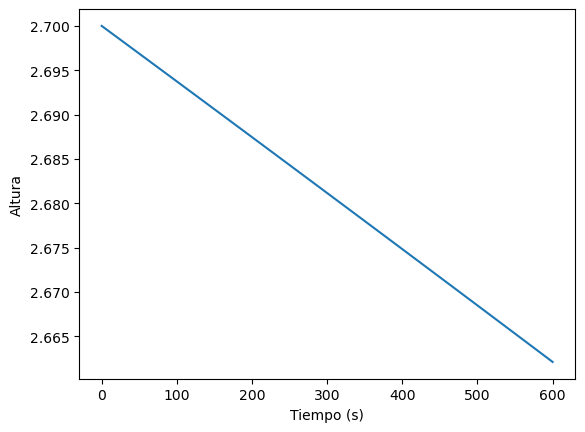

In [4]:
ts,sol = rk4(df,0,600,x0,600//20)
plt.plot(ts,sol)
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura')

Para el estanque vacio calculamos la aproximacion hasta que de un valor invalido. Para ello tomamos un intervalo muy grande

Nro. de evaluaciones rk4: 4000


C:\Users\gonza\AppData\Local\Temp\ipykernel_4628\3718193022.py:5: RuntimeWarning: invalid value encountered in sqrt
  return -0.6*np.pi*r**2*np.sqrt(2*g)*np.sqrt(x)/A


Text(0, 0.5, 'Altura')

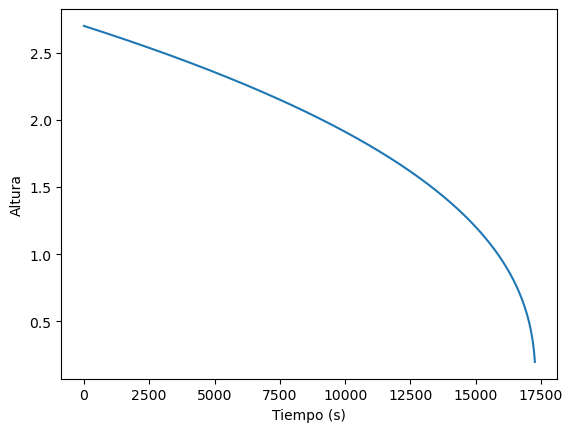

In [5]:
tf,xf = rk4_m(df, 0, 60*288, x0, 1000) #se demora aprox 288 minutos
plt.plot(tf,xf)
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura')

# Calificación: 7.0